Compiled by: Maria Stoica  
Last edit: 14 February 2017

# Setting up the environment.

Importing Pandas, Matplotlib, Numpy, and Datetime packages (make sure to have these installed before executing).

In [1]:
#Pandas for data frames and data manipulation
import pandas as pd
#datetime to check data availability
import datetime
#plotting functions
import matplotlib.pyplot as plt
#numpy for unique function for data analysis
import numpy as np

#this line is necessary for iPython notebook
%matplotlib inline

Now we can read the discharge data into a dataframe using Pandas. Make sure you have downloaded the file cpcrw_flow_1965-2015.txt and that the pathname is correct before executing. We have placed ours in the local directory 'discharges.'

In [2]:
# Load file
ext='discharges/'
flow_data = pd.read_csv(ext+'cpcrw_flow_1969-2015.txt')

# Exploring and organizing the data.

Let's look at the way the data is formatted:

In [3]:
flow_data.head()

,Watershed,Date-Time,Flow,Units,Flag
0,C2,7/14/1978 7:00:00,29.19,L/s,G
1,C2,7/14/1978 8:00:00,28.28,L/s,G
2,C2,7/14/1978 9:00:00,28.28,L/s,G
3,C2,7/14/1978 10:00:00,27.38,L/s,G
4,C2,7/14/1978 11:00:00,27.38,L/s,G


There are 5 columns in the data file. The first column indicates the watershed name. Let's look at how many possible values are in the Watershed column:

In [4]:
np.unique(flow_data['Watershed'])

array(['C2', 'C3', 'C4'], dtype=object)

We see that the data for the three watersheds, C2, C3, and C4, is interleaved. The next column is the Date-Time. The last three columns indicate the Flow rate, Units for the Flow rate, and a flag that reads 'G' when the data is good. We only want 'G' data for our analysis.

First, let's check that all the units are uniform:

In [5]:
np.unique(flow_data['Units'])

array(['L/s'], dtype=object)

It is also instructive to look at the distribution of the data. It seems that there are a few outliers, so we should be cautious with those data points.

(array([  6.18766000e+05,   3.25000000e+02,   5.40000000e+01,
          9.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([    0.   ,   925.331,  1850.662,  2775.993,  3701.324,  4626.655,
         5551.986,  6477.317,  7402.648,  8327.979,  9253.31 ]),
 <a list of 10 Patch objects>)

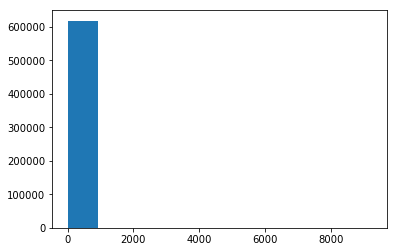

In [6]:
plt.hist(flow_data['Flow'])

Next, let's check for bad data.

In [7]:
np.unique(flow_data['Flag'])

array(['G'], dtype=object)

Our data is uniform and good. Now, let's try to check the formatting for the 'Date-Time' column; this column is most useful to us in a numeric format, so we will try converting it to seconds:

In [8]:
flow_data.loc[:,'time-seconds']=flow_data['Date-Time'].apply(lambda x: (datetime.datetime.strptime(x,\
    '%m/%d/%Y %H:%M:%S')-datetime.datetime(1970,1,1)).total_seconds())

In [9]:
flow_data['time-seconds'].head()

0    269247600.0
1    269251200.0
2    269254800.0
3    269258400.0
4    269262000.0
Name: time-seconds, dtype: float64

We also note that the data is not ordered.

In [10]:
pd.algos.is_monotonic_float64(flow_data['time-seconds'].values, False)[0]

False

In [12]:
a = flow_data['time-seconds'].sort_values()
pd.algos.is_monotonic_float64(a.values, False)[0]

True

# Extracting and looking at a piece of the data.

We would like to extract a slice of the data for a particular period of time for the C2 watershed:

In [13]:
time_min=(datetime.datetime.strptime('2008/07/28  16:00:00',\
    '%Y/%m/%d %H:%M:%S')-datetime.datetime(1970,1,1)).total_seconds()
time_max=(datetime.datetime.strptime('2008/07/30  18:00:00',\
    '%Y/%m/%d %H:%M:%S')-datetime.datetime(1970,1,1)).total_seconds()
flow_data_slice=flow_data[(flow_data['time-seconds']>=time_min)&(flow_data['time-seconds']<=time_max)]

Now, let's plot the data so we can see the precipitation event we are investigating.

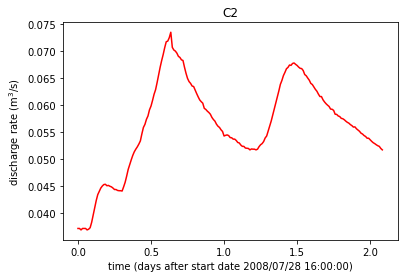

In [14]:
def plot_flow_data(flow_data,time_ref,watershed='C2'):
    # Extract the data for the C2 watershed
    temp=flow_data[flow_data['Watershed']==watershed]
    
    # Simple plot to check the data
    plt.plot(temp['time-seconds']/3600/24-time_ref/3600/24,\
        temp['Flow']*.001, 'r-')
    plt.xlabel('time (days after start date 2008/07/28 16:00:00)')
    plt.ylabel('discharge rate (m$^3$/s)')
    plt.title(watershed)
    plt.show()
    
plot_flow_data(flow_data_slice,time_min)

We see that for our particular event, there are three visible peaks, with a fourth peak (at 0.5 days after start date) that is incorporated into the second peak and appears as a shoulder. To see whether there is a stable baseflow (0.037 m^3/s) at the start time, we can plot back to an earlier time.

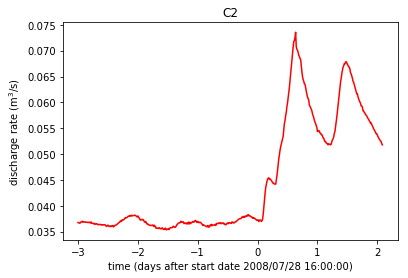

In [15]:
time_start=(datetime.datetime.strptime('2008/07/25  16:00:00',\
    '%Y/%m/%d %H:%M:%S')-datetime.datetime(1970,1,1)).total_seconds()
flow_data_slice=flow_data[(flow_data['time-seconds']>=time_start)&(flow_data['time-seconds']<=time_max)]
plot_flow_data(flow_data_slice,time_min)